In [41]:
import tensorflow as tf 
from tensorflow import keras
from sklearn import preprocessing, model_selection
import numpy as np 
import pandas as pd 

In [42]:
df = pd.read_csv('6 class csv.csv')
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [43]:
df.isnull().values.any()

False

In [44]:
df.corr()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
Temperature (K),1.000000,0.393404,0.064216,-0.420261,0.411129
Luminosity(L/Lo),0.393404,1.000000,0.526516,-0.692619,0.676845
Radius(R/Ro),0.064216,0.526516,1.000000,-0.608728,0.660975
Absolute magnitude(Mv),-0.420261,-0.692619,-0.608728,1.000000,-0.955276
Star type,0.411129,0.676845,0.660975,-0.955276,1.000000


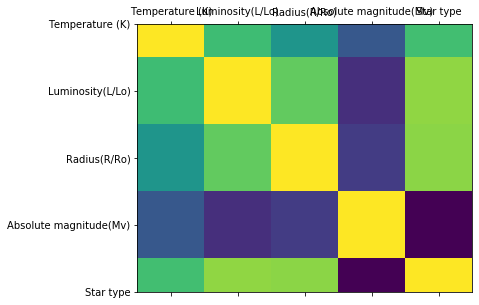

In [45]:
import matplotlib.pyplot as plt

def plot_corr(df):
    corr = df.corr()
    fig,ax = plt.subplots(figsize = (6,6))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
    
    
plot_corr(df)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
Temperature (K)           240 non-null int64
Luminosity(L/Lo)          240 non-null float64
Radius(R/Ro)              240 non-null float64
Absolute magnitude(Mv)    240 non-null float64
Star type                 240 non-null int64
Star color                240 non-null object
Spectral Class            240 non-null object
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [47]:
x = np.array(df.drop(['Star type', 'Star color','Spectral Class'],1))   

In [48]:
y = np.array(df['Star type'], dtype ='float')
y.shape = (len(y),1)

In [49]:
x_train ,x_test , y_train, y_test = model_selection.train_test_split(x,y, test_size = 0.3) 

In [50]:
x_f_train = preprocessing.scale(x_train)
x_f_test = preprocessing.scale(x_test)
y_f_train = y_train
y_f_test = y_test

In [51]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())

In [52]:
x_f_train.shape

(168, 4)

In [53]:
y_f_train.shape

(168, 1)

In [54]:
from keras.layers import Dense

In [55]:
model.add(tf.keras.layers.Dense(200,activation ='relu'))

In [56]:
model.add(tf.keras.layers.Dense(300,activation = 'relu'))

In [57]:
model.add(tf.keras.layers.Dense(6,activation = 'softmax'))

In [58]:
from keras.optimizers import RMSprop

In [59]:
model.compile(optimizer = 'Adam',
       loss = 'sparse_categorical_crossentropy',
       metrics=['accuracy'])

In [60]:
model.fit(x_f_train,y_f_train, epochs = 100)


Train on 168 samples
Epoch 1/100
168/168 [==============================] - 1s 5ms/sample - loss: 1.6082 - accuracy: 0.5298
Epoch 2/100
168/168 [==============================] - 0s 124us/sample - loss: 1.2355 - accuracy: 0.7262
Epoch 3/100
168/168 [==============================] - 0s 126us/sample - loss: 0.9866 - accuracy: 0.7381
Epoch 4/100
168/168 [==============================] - 0s 104us/sample - loss: 0.7888 - accuracy: 0.7381
Epoch 5/100
168/168 [==============================] - 0s 131us/sample - loss: 0.6300 - accuracy: 0.8274
Epoch 6/100
168/168 [==============================] - 0s 119us/sample - loss: 0.4996 - accuracy: 0.9405
Epoch 7/100
168/168 [==============================] - 0s 116us/sample - loss: 0.4060 - accuracy: 0.9226
Epoch 8/100
168/168 [==============================] - 0s 130us/sample - loss: 0.3353 - accuracy: 0.9345
Epoch 9/100
168/168 [==============================] - 0s 130us/sample - loss: 0.2879 - accuracy: 0.9702
Epoch 10/100
168/168 [==============

168/168 [==============================] - 0s 118us/sample - loss: 0.0101 - accuracy: 1.0000
Epoch 79/100
168/168 [==============================] - 0s 121us/sample - loss: 0.0103 - accuracy: 1.0000
Epoch 80/100
168/168 [==============================] - 0s 148us/sample - loss: 0.0097 - accuracy: 1.0000
Epoch 81/100
168/168 [==============================] - 0s 177us/sample - loss: 0.0097 - accuracy: 1.0000
Epoch 82/100
168/168 [==============================] - 0s 127us/sample - loss: 0.0099 - accuracy: 1.0000
Epoch 83/100
168/168 [==============================] - 0s 149us/sample - loss: 0.0097 - accuracy: 1.0000
Epoch 84/100
168/168 [==============================] - 0s 215us/sample - loss: 0.0098 - accuracy: 1.0000
Epoch 85/100
168/168 [==============================] - 0s 148us/sample - loss: 0.0097 - accuracy: 1.0000
Epoch 86/100
168/168 [==============================] - 0s 131us/sample - loss: 0.0110 - accuracy: 1.0000
Epoch 87/100
168/168 [==============================] - 0s 

In [61]:
val_loss,val_acc = model.evaluate(x_f_test,y_f_test)
print("Loss % = {} , Accuracy % = {} ".format(val_loss*100,val_acc*100))

72/72 [==============================] - 0s 3ms/sample - loss: 0.1101 - accuracy: 0.9722
Loss % = 11.009497205830282 , Accuracy % = 97.22222089767456 


In [62]:
model.save('star_classification.h5')